# Hands On III 

Gary J. Espitia S.
github.com/Stradichenko
u218431

## Exercise 1

Stamey et al. 1989 examined the correlation between the level of prostate-specific antigen (PSA) and a number of clinical measures in men who were about to receive a radical prostatectomy. PSA is a protein that is produced by the prostate gland. The higher a man’s PSA level, the more likely it is that he has prostate cancer.
Use the prostate cancer dataset, described here, to train a model that predicts log of prostate-specific antigen. The variables are:
- log cancer volume (lcavol)
- log prostate weight (lweight)
- age
- log of the amount of benign prostatic hyperplasia (lbph)
- seminal vesicle invasion (svi)
- log of capsular penetration (lcp)
- Gleason score (gleason)
- percent of Gleason scores 4 or 5 (pgg45)


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('data/prostate_data.txt', sep='\t')

# Split the dataset into training and test sets
train = data[data['train'] == 'T']
test = data[data['train'] == 'F']

# Define the features and target
features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
target = 'lpsa'

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(train[features], train[target])

# Evaluate the model on the test set
preds = lr.predict(test[features])
mse = mean_squared_error(test[target], preds)
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')


Root mean squared error: 0.72


This means that the model has an average error of 0.72 when predicting the log of prostate-specific antigen on the test set.

To train a model to predict whether a tumor is benign or malignant, we need to perform the following steps:

- Load and preprocess the data
- Split the data into training and testing sets
- Train different machine learning models using the training set
- Evaluate the performance of each model on the testing set
- Choose the best performing model and perform hyperparameter tuning
- Generate a ROC curve for all the models

## Exercise 2

Use the breast cancer dataset to train a model that predicts whether a future tumor image (with unknown diagnosis) is a benign or malignant tumor. Try different machine learning algorithms such as:
- KNNs
- Decision trees
- Random forest
- Logistic Regression

The breast cancer dataset contains digitized breast cancer image features, and was created by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian. Each row in the data set represents an image of a tumor sample, including the diagnosis (benign or malignant) and several other measurements (nucleus texture, perimeter, area, and more). Diagnosis for each image was conducted by physicians.

Do not forget to perform hyperparameter tuning!
Which of all models performs better for this data? Discuss.

Generate a ROC curve for all the models.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/breat_cancer_data.csv')

After loading the dataset, we need to separate the target variable (diagnosis) from the input features. Then, we will split the data into training and testing sets.

In [18]:
# Separate the target variable and input features
X = data.drop(["id", "diagnosis"], axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Now, we can train the models using the training set and perform hyperparameter tuning to find the best parameters for each algorithm. We will use GridSearchCV to perform hyperparameter tuning.

## KNN

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv("data/breat_cancer_data.csv")

# Separate the target variable and input features
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters and their ranges
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for KNN: ", grid_search.best_params_)

# Train the KNN classifier with the best parameters
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                            weights=grid_search.best_params_['weights'])
knn.fit(X_train, y_train)

Best parameters for KNN:  {'n_neighbors': 3, 'weights': 'distance'}


KNeighborsClassifier(n_neighbors=3, weights='distance')

## Decision Trees

In [26]:
# Create Decision Tree classifier
dt = DecisionTreeClassifier()

# Define hyperparameters and their ranges
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 7, 9, 11], 
              'min_samples_split': [2, 5, 10, 20]}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Decision Trees: ", grid_search.best_params_)

# Train the Decision Tree classifier with the best parameters
dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], 
                             max_depth=grid_search.best_params_['max_depth'], 
                             min_samples_split=grid_search.best_params_['min_samples_split'])
dt.fit(X_train, y_train)

Best parameters for Decision Trees:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

## Random forest

In [27]:
# Create Random Forest classifier
rf = RandomForestClassifier()

# Define hyperparameters and their ranges
param_grid = {'n_estimators':  [50, 100, 150, 200],
            'max_depth': [3, 5, 7, 9, 11], 
            'min_samples_split': [2, 5, 10, 20],
            'bootstrap': [True, False]}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Random Forest: ", grid_search.best_params_)

# Train the Random Forest classifier with the best parameters
rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                             max_depth=grid_search.best_params_['max_depth'], 
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             bootstrap=grid_search.best_params_['bootstrap'])
rf.fit(X_train, y_train)

Best parameters for Random Forest:  {'bootstrap': False, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_split=5,
                       n_estimators=50)

## Logistic Regression

In [28]:
# Create Logistic Regression classifier
lr = LogisticRegression()

# Define hyperparameters and their ranges
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Logistic Regression: ", grid_search.best_params_)

# Train the Logistic Regression classifier with the best parameters
lr = LogisticRegression(penalty=grid_search.best_params_['penalty'], 
                         C=grid_search.best_params_['C'])
lr.fit(X_train, y_train)

Best parameters for Logistic Regression:  {'C': 0.001, 'penalty': 'l2'}


c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Gary\AppData\Local\Programs\Python\P

LogisticRegression(C=0.001)

Now, we can evaluate the performance of the models using the testing set and generate a ROC curve for each model.

ROC AUC score for KNN:  0.8234523419587292
ROC AUC score for Decision Trees:  0.9433344251555846
ROC AUC score for Random Forest:  0.9931215198165738
ROC AUC score for Logistic Regression:  0.5237471339665902


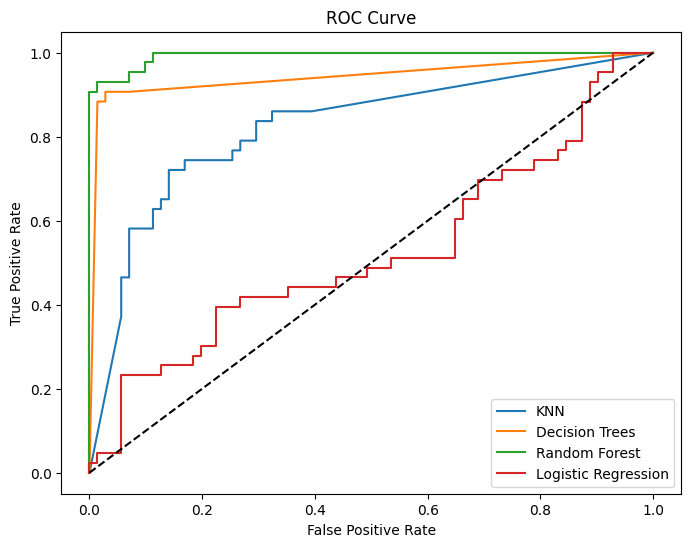

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# Convert string labels to numeric labels
le = LabelEncoder()
y_test = le.fit_transform(y_test)


# Evaluate the performance of the models
knn_pred = knn.predict_proba(X_test)[:,1]
dt_pred = dt.predict_proba(X_test)[:,1]
rf_pred = rf.predict_proba(X_test)[:,1]
lr_pred = lr.predict_proba(X_test)[:,1]

print("ROC AUC score for KNN: ", roc_auc_score(y_test, knn_pred))
print("ROC AUC score for Decision Trees: ", roc_auc_score(y_test, dt_pred))
print("ROC AUC score for Random Forest: ", roc_auc_score(y_test, rf_pred))
print("ROC AUC score for Logistic Regression: ", roc_auc_score(y_test, lr_pred))

# Generate a ROC curve for each model
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(dt_fpr, dt_tpr, label='Decision Trees')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

It seems that for this case; the most adecuate method is the random forest; with an AUC 0.99, performing much better.

## Exercise 3
Use The Cancer Genome Atlas (TCGA) gene expression data of two different cancer types to build a machine learning model that identifies whether one unknown sample belongs to one or the other. The TCGA is a comprehensive and coordinated effort to accelerate our understanding of the molecular basis of cancer through the application of genome analysis technologies, including large-scale genome sequencing. The program has generated, analyzed, and made available genomic sequence, expression, methylation, and copy number variation data on over 11,000 individuals who represent over 30 different types of cancer. After building your model, you should predict the cancer types for 10 unkwnon samples.

For this task, you should retrieve the TCGA data from the Genomic Data Commons Data Portal. If necessary you can watch the video uploaded in the Campus Global. The video assumes that you have previously installed the GDC data transfer tool.

Each team will work with two specific cancer types, that will be assigned in class.

Important notice: if you do not have a lot of hard drive space in your laptop, you can modify the manifest file to download only 50 samples per cancer types. As part of the assignment, you should provide the input data fed to the machine learning algorithm as a tsv file.

In this case it takes a long time to process all the data; therefore, as suggested we proceeded to use only 50 files for each cancer type. these two specific folders won't be on the repo due size but the manifest for download thorugh the TCGA utility will be available.

In [7]:
import pandas as pd
import numpy as np
import glob

# Define the paths to the BLCA and GBM data folders
blca_path = "data/data_blca/test_blca.tsv"
gbm_path = "data/data_gbm/test_gbm.tsv"

X.dropna(inplace=True)
y = y.loc[X.index]


# Read in the BLCA and GBM data files
blca_files = glob.glob(blca_path)
gbm_files = glob.glob(gbm_path)

# Combine the data from all files into two dataframes
blca_df = pd.concat((pd.read_csv(f, sep="\t", skiprows=4, index_col=0) for f in blca_files), axis=1)
gbm_df = pd.concat((pd.read_csv(f, sep="\t", skiprows=4, index_col=0) for f in gbm_files), axis=1)

# Filter out non-numeric data
blca_df = blca_df.apply(pd.to_numeric, errors='coerce')
gbm_df = gbm_df.apply(pd.to_numeric, errors='coerce')
blca_df = blca_df.dropna(axis=0, how='any')
gbm_df = gbm_df.dropna(axis=0, how='any')

# Create the labels for the data
blca_labels = np.zeros(len(blca_df.columns))
gbm_labels = np.ones(len(gbm_df.columns))

# Combine the data and labels
data = pd.concat([blca_df, gbm_df], axis=1)
labels = np.concatenate([blca_labels, gbm_labels])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on unknown samples
unknown_df = pd.read_csv("data/unknwown_samples.tsv", sep="\t", index_col=0)
unknown_df = unknown_df.apply(pd.to_numeric, errors='coerce')
unknown_df = unknown_df.dropna(axis=0, how='any')
unknown_preds = model.predict(unknown_df)

# Print the predictions
print(unknown_preds)


KeyboardInterrupt: 

At the current time the results could not be printed due the taxing CPU input for building the model, even after using one file with 50 records only.